In [1]:
import numpy as np
import scipy.sparse as spsp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

In [2]:
# Diffusion function
g = lambda s: 1/(1+s)
g_exp = lambda s: np.exp(-s)

# Test function
def f(x, alpha):
    first = 5-np.tanh(alpha*(x-1))-np.tanh(alpha*(x-2))
    second = np.tanh(alpha*(x-4)) + np.tanh(alpha*(x-5)) + 0.1*(np.sin(5*x))**2*np.sin(50*x)
    return first+second

# Create random 1D function
def generate_random1D(M):
    I = np.zeros(M+2)
    s = (M + 2)//5
    for i in range(5):
        I[i*s:(i+1)*s+1] = 10*np.random.randint(1, 5)
        
    # Add noise to interior points
    I[1:-1] = I[1:-1] + np.random.normal(0, 2, size = M)
    return I

In [3]:
# Return differentiation matrix, central differences
def diffX(M):
    dx = 1/(M+1)
    Dx = -1 * np.eye(M+2, k = -1) + np.eye(M+2, k = 1)
    Dx[0, :3] = [-3, 4, -1]
    Dx[-1, -3:] = [1, -4, 3]
    Dx /= 2*dx
    return Dx

def support_matrices(M):
    # Construction Matrices
    Ξ = np.eye(M+2, k = -1) + np.eye(M+2)
    Ξ[0, :2] = 0
    Ξ[-1, -2:] = 0
    
    Ω = - np.eye(M+2, k = -1) - 2 * np.eye(M+2) - np.eye(M+2, k = 1)
    Ω[0, :3] = 0
    Ω[-1, -3:] = 0
    
    Γ = np.eye(M+2) + np.eye(M+2, k = 1)
    Γ[0, :3] = 0
    Γ[-1, -3:] = 0
    
    return Ξ, Ω, Γ

def assemble_A(u, M, g, Dx, Ξ, Ω, Γ):
    dx = 1/(M+1)
    G = g(Dx.dot(u)**2)
    ξ = Ξ.dot(u)
    ω = Ω.dot(u)
    γ = Γ.dot(u)
    
    diags = (ξ[1:], ω, γ[:-1])
    A = spsp.diags(diags, (-1, 0, 1))/(2*dx**2)
    return A


def echo_output(M, G, Dx, u):
    plt.figure()#figsize = (12,12))
#     plt.subplot(211)
    plt.plot(u)
    
#     plt.subplot(132)
#     plt.plot(Dx.dot(u))
    
#     plt.subplot(212)
#     plt.plot(G)
    
    plt.show()
    
def solve_FE(u0, g, M, T, dt, echo = False):
    dx = 1/(M+1)
    
    r = 1/2 * (dt/dx**2)
    
    U = np.zeros((T, M+2))
    U[0] = u0
    
    Dx = diffX(M)
    
    Ξ, Ω, Γ = support_matrices(M)
    
    for it in range(T-1):
        A = assemble_A(U[it], M, g, Dx, Ξ, Ω, Γ)
        G = g(Dx.dot(U[it])**2)
        
        U[it+1] = U[it] + r * A.dot(U[it])
        if echo:
            if it % (T//30) == 0:
                echo_output(M, G, Dx, U[it])
    return U
        
    
    
def solve_BE(u0, g, M, T, dt, echo = False):
    dx = 1/(M+1)
    
    r = 1/2 * (dt/dx**2)
    
    U = np.zeros((T, M+2))
    U[0] = u0
    
    Dx = diffX(M)
    
    Ξ, Ω, Γ = support_matrices(M)
    
    for it in range(T-1):
        A = assemble_A(U[it], M, g, Dx, Ξ, Ω, Γ)
        G = g(Dx.dot(U[it])**2)
        
        U[it+1] = spla.spsolve(spsp.identity(M+2) - r * A, U[it])
        
        if echo:
            if it % (T//30) == 0:
                echo_output(M, G, Dx, U[it])
    return U
        
    
def solve_CN(u0, g, M, T, dt, echo = False):
    dx = 1/(M+1)
    
    r = 1/2 * (dt/dx**2)
    
    U = np.zeros((T, M+2))
    U[0] = u0
    
    Dx = diffX(M)
    
    Ξ, Ω, Γ = support_matrices(M)
    
    for it in range(T-1):
        A = assemble_A(U[it], M, g, Dx, Ξ, Ω, Γ)
        G = g(Dx.dot(U[it])**2)
        
        U[it+1] = spla.spsolve(spsp.identity(M+2) + r * A, (spsp.identity(M+2) - r*A).dot(U[it]))
        
        if echo:
            if it % (T//30) == 0:
                echo_output(M, G, Dx, U[it])
    return U
        

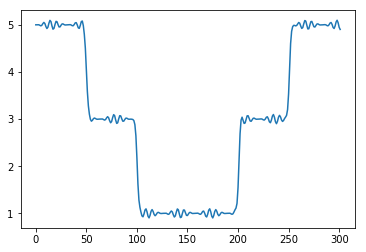

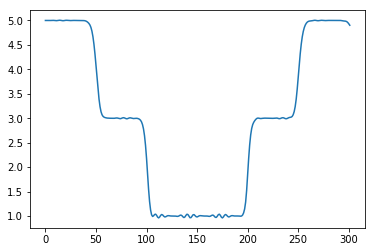

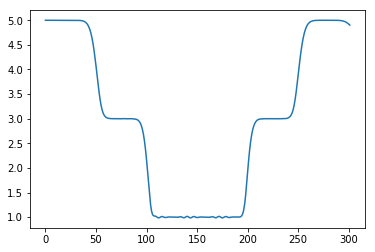

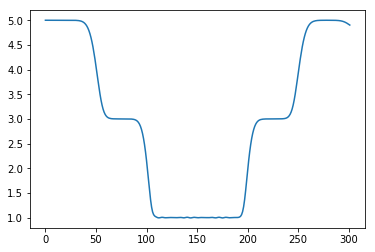

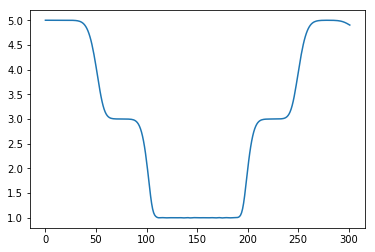

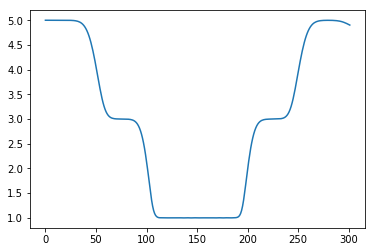

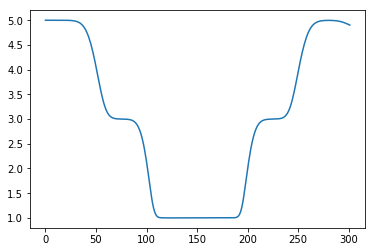

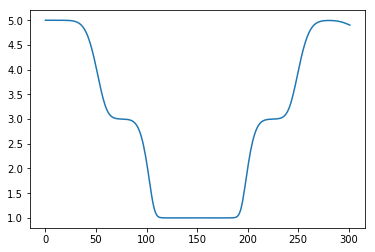

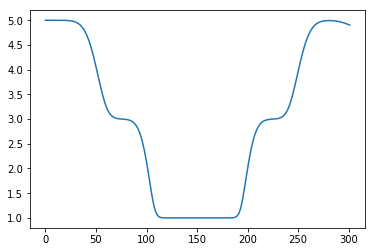

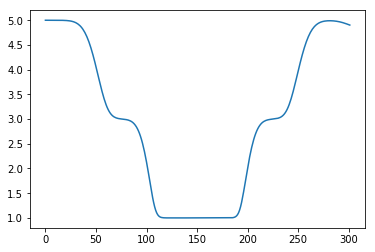

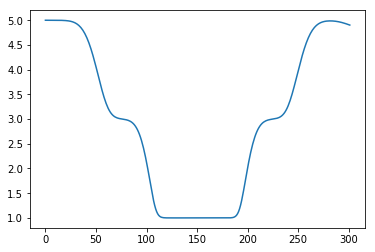

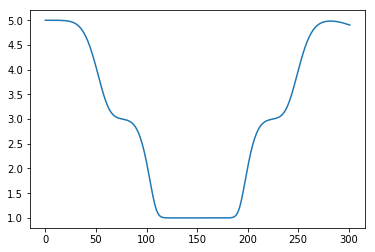

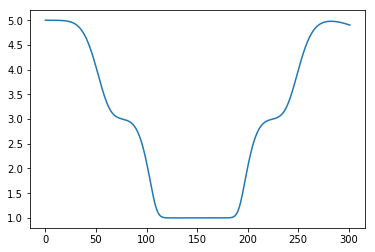

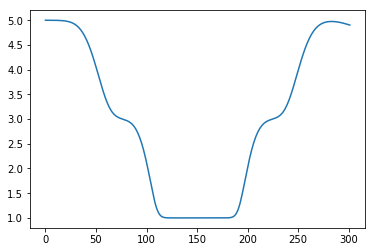

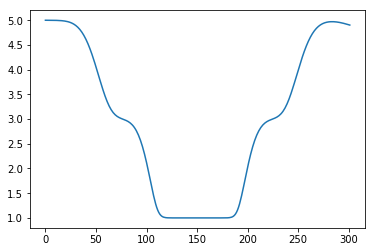

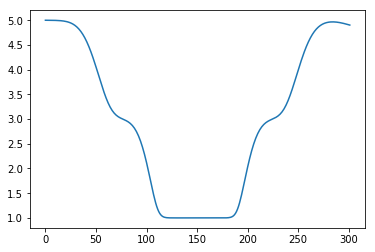

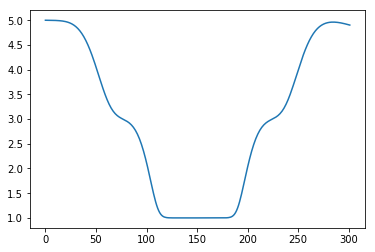

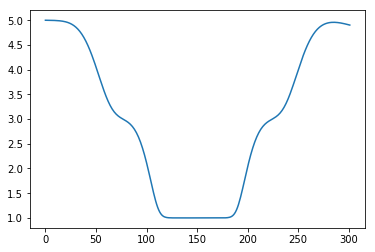

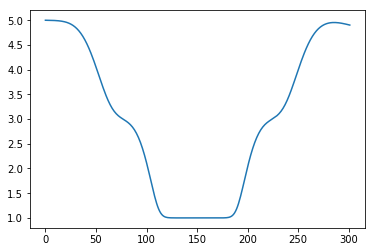

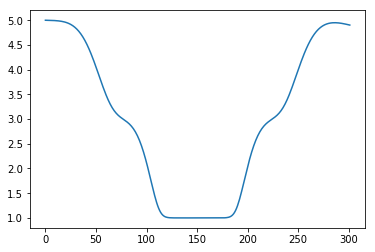

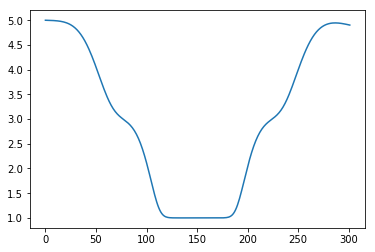

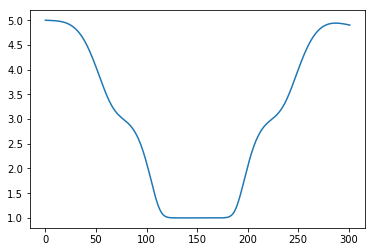

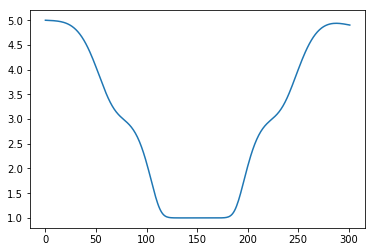

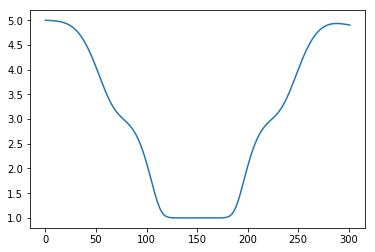

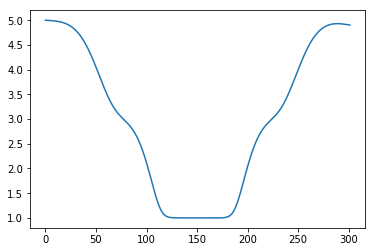

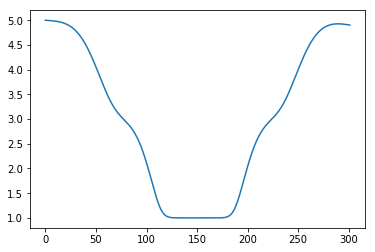

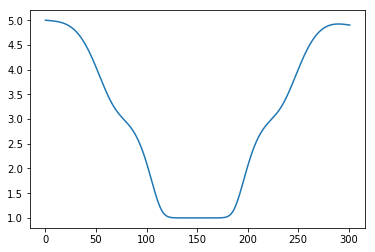

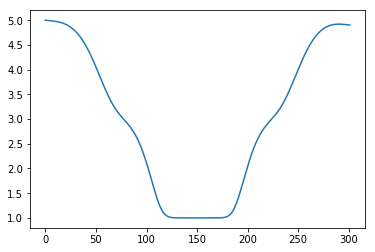

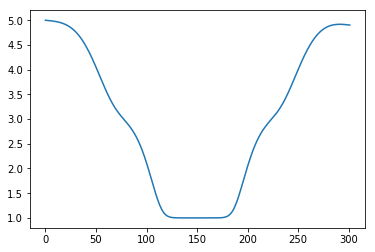

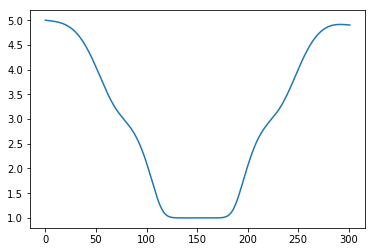

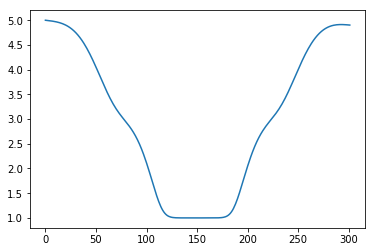

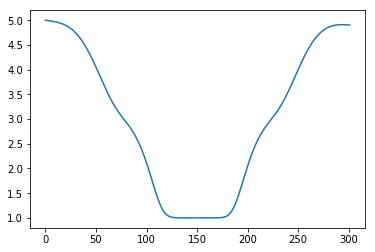

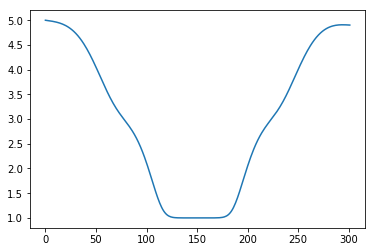

In [4]:
M = 300
T = 100
dt = 1e-10
g = lambda s: 1/(1+s)

u0 = f(np.linspace(0, 6, M+2), 30)

U = solve_BE(u0, g, M, T, dt, True)

In [5]:
for i in range(plt.plot)

SyntaxError: invalid syntax (<ipython-input-5-66af68c6880e>, line 1)

## Explicit, Forward Euler

In [ ]:
A = np.zeros((M+2, M+2))
for i in range(T-1):
    G = g(Dx.dot(U[i])**2)
    γ = Γ.dot(U[i])
    ω = Ω.dot(U[i])
    ξ = Ξ.dot(U[i])
    for j in range(1, M+1):
        A[j, j-1:j+2] = [ξ[j-1], ω[j-1], γ[j-1]]
    U[i+1] = U[i] + r * A.dot(U[i])
    
    if i % (T//15) == 0:
        plt.figure(figsize = (12,8))
        plt.subplot(221)
        plt.plot(U[i])
        plt.subplot(222)
        plt.plot(G)
        plt.subplot(223)
        plt.plot(A.dot(U[i]))
        plt.subplot(224)
        plt.plot(Dx.dot(U[i]))

        plt.show()

In [ ]:
plt.figure()
plt.plot(U[0])

plt.figure()
plt.plot(U[T//2])

plt.figure()
plt.plot(U[-1])
plt.show()

##  Implicit

In [ ]:
plt.close()

In [ ]:
T = 3000
dt = 0.1

A = np.zeros((M+2, M+2))
for i in range(T-1):
    G = g(Dx.dot(U[i])**2)
    γ = Γ.dot(U[i])
    ω = Ω.dot(U[i])
    ξ = Ξ.dot(U[i])
    for j in range(1, M+1):
        A[j, j-1:j+2] = [ξ[j-1], ω[j-1], γ[j-1]]
    
        U[i+1] = np.linalg.solve(np.identity(M+2) - r * A, U[i])
        if i % 1 == 0:
            plt.figure(figsize=(12,8))
            plt.subplot(221)
            plt.plot(U[i])
            plt.subplot(222)
            plt.plot(G)
            plt.subplot(223)
            plt.plot(A.dot(U[i]))
            plt.subplot(224)
            plt.plot(Dx.dot(U[i]))

In [ ]:
plt.figure()
plt.plot(U[0])

plt.figure()
plt.plot(U[T//2])

plt.figure()
plt.plot(U[-1])
plt.show()